In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# n =[]
# x= 0
# for i in [1,2,3,4]:
#     x = x+ i
#     n.append(x) 
# print(n)       

In [3]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.info()

#Time_point_abbr is the location

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [4]:
#show all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [6]:
#calculate percentage of ontime value =1 div by all rows

wego['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    270048
0     80281
Name: count, dtype: int64

In [7]:
#77 percent of the buses arrived on time
270048/(270048+80281)

0.7708411236295025

In [8]:
wego['PREV_SCHED_STOP_CANCELLED'].value_counts()

PREV_SCHED_STOP_CANCELLED
0.0    275746
1.0      4254
Name: count, dtype: int64

In [9]:
#Count the values that each row occurs
adjcounts= wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 
                        'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
adjcounts

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,270048
1,0,1,0,59038
2,0,0,0,11468
3,1,0,0,9775


In [10]:
#percentage of ontime trips
((adjcounts['count'].loc[0])/(adjcounts['count']
                              .loc[0]+adjcounts['count']
                           .loc[1]+adjcounts['count'].loc[3]))


# ALt# Percent of on-time stops - using only tagged rows
# round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
#                                                + wego['ADJUSTED_EARLY_COUNT'].sum() 
#                                                + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

0.7969285341187095

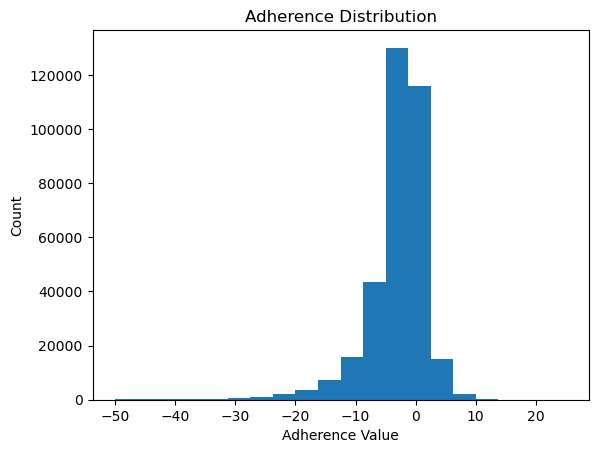

In [95]:
plt.hist(x=wego['ADHERENCE'],bins=20,range=(-50, 25))  #, y= wego['HDWY_DEV'])
plt.title('Adherence Distribution')
plt.xlabel('Adherence Value')
plt.ylabel('Count')
plt.show()

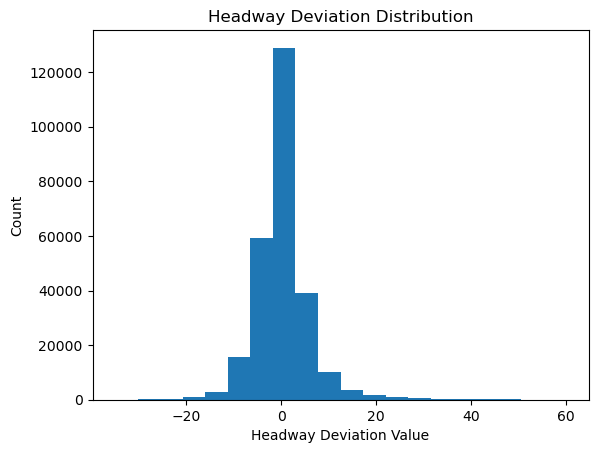

In [97]:
plt.hist(x=wego['HDWY_DEV'],bins=20,range=(-35, 60))  #, y= wego['HDWY_DEV'])
plt.title('Headway Deviation Distribution')
plt.xlabel('Headway Deviation Value')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='HDWY_DEV'>

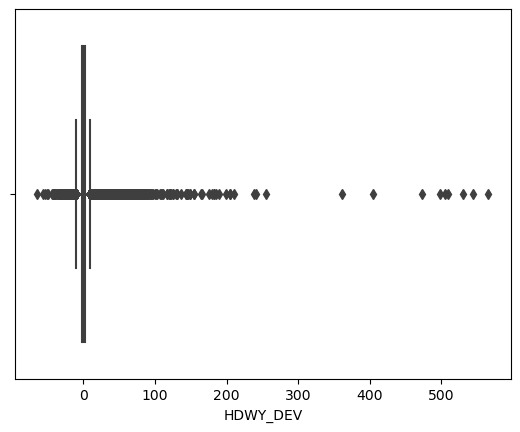

In [12]:
sns.boxplot(x='HDWY_DEV', data=wego)

<Axes: xlabel='ADHERENCE'>

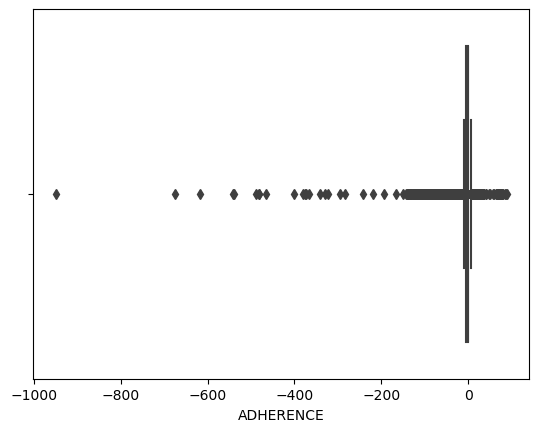

In [13]:
sns.boxplot(x='ADHERENCE', data=wego)

In [14]:
#sns.displot(data=wego["ADHERENCE"], kde=True)
#sns.violinplot(data=wego,x=wego["ADHERENCE"])

In [15]:
wego['IS_RELIEF'].value_counts()

IS_RELIEF
0    346141
1      4188
Name: count, dtype: int64

In [16]:
# ontime = wego[wego['ADJUSTED_ONTIME_COUNT']==1]& #add scheduled column value is 1
# ontime.head()

In [17]:
#wego['ADHERENCE'].agg(min, max)
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-948.533333
max,88.383333
mean,-3.188796


In [18]:
wego['ADHERENCE'].max()

88.383333

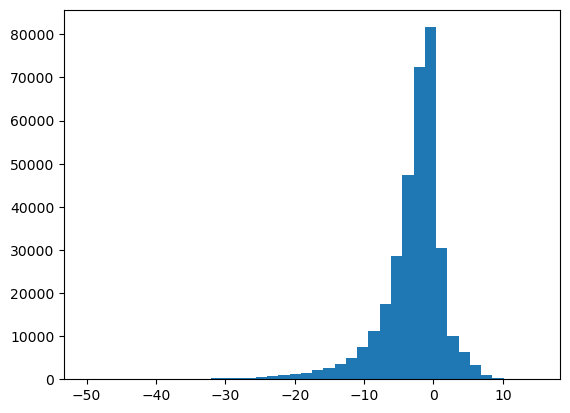

In [19]:
plt.hist(x=wego['ADHERENCE'],bins=40, range=(-50, 15))  #, y= wego['HDWY_DEV'])
plt.show()

In [20]:
#trim cancelled = 1 and headway great
sced = wego[wego['PREV_SCHED_STOP_CANCELLED']==1]
#sced
adsort= sced.sort_values(['ACTUAL_HDWY'])
adsort.shape

(4254, 30)

In [21]:
wego2 = wego[wego['PREV_SCHED_STOP_CANCELLED']!=1]
wego2.shape

(346075, 30)

In [22]:
#percentile cleaning
headway =wego2['HDWY_DEV']
headway2 = headway.dropna()
headwaydev_1= np.percentile(headway2,.1)
headwaydev_99=np.percentile(headway2,99.9)

print(headwaydev_1)
print(headwaydev_99)

-21.624767162
56.43715000000084


In [23]:
wego3= wego2[wego2['HDWY_DEV']>=56]

wego3.shape

(269, 30)

###Cleaned wego data removed PREV_SCHED_STOP_CANCELLED = 1 and Where early, late and on-time = 0

In [24]:
#df.drop(df[(df['col_1'] == 1.0) & (df['col_2'] == 0.0)].index)

wego4 = wego2.drop(wego2[(wego2.ADJUSTED_EARLY_COUNT==0)& (wego2.ADJUSTED_LATE_COUNT==0) & 
                        (wego2.ADJUSTED_ONTIME_COUNT==0)].index)

wego4.shape

(335191, 30)

In [25]:
wego4['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    267312
0     67879
Name: count, dtype: int64

In [26]:
adjcounts2= wego4[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 
                        'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
adjcounts2

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,267312
1,0,1,0,58183
2,1,0,0,9696


In [27]:
# On-time performance

267312/(267312+58183+9696)

0.7974915794278487

## Buses are on-time 80 percent of the time

In [28]:
#percentile cleaning
headwy =wego4['HDWY_DEV']
headwy2 = headwy.dropna()
headwydev_1= np.percentile(headwy2,.1)
headwydev_99=np.percentile(headwy2,99.9)

print(headwydev_1)
print(headwydev_99)

-21.624767162
56.43715000000084


In [29]:
#percentile cleaning
adhe =wego4['ADHERENCE']
adhe_1= np.percentile(adhe,.1)
adhe_99=np.percentile(adhe,99.9)

print(adhe_1)
print(adhe_99)

-57.040499999999994
9.466666


In [30]:
wego5 = wego4.drop(wego4[wego4.ADHERENCE < adhe_1].index)
wego6 = wego5.drop(wego5[wego5.ADHERENCE > adhe_99].index)
wego7 = wego6.drop(wego6[wego6.HDWY_DEV < headwydev_1].index)
wego8 = wego7.drop(wego7[wego7.HDWY_DEV > headwydev_99].index)
wego8.shape

(334031, 30)

In [48]:
wegos=wego8
wegos.head(100)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,7.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-3.222227


In [32]:
adjusted_counts = wego8[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

In [33]:
adjusted_counts.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,266891
1,0,1,0,57690
2,1,0,0,9450


In [46]:
#On-time
#266891/(266891+57690+9450)
#round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego.shape[0]) * 100, 2)


In [35]:
#Early
9450/(266891+57690+9450)

0.028290787382009453

In [36]:
#Late
57690/(266891+57690+9450)

0.1727085210654101

# check

In [163]:
wego9 = wego8['SCHEDULED_HDWY']!=0
wego9.shape

(334031,)

In [51]:
wego8['HDWY_DEV_PER']= (wego8['HDWY_DEV']/wego8['SCHEDULED_HDWY']*100)


In [158]:
(wego['SCHEDULED_HDWY']==0).value_counts()

SCHEDULED_HDWY
False    350221
True        108
Name: count, dtype: int64

In [160]:
wego8['HDWY_DEV_PER'].shape

(334031,)

In [128]:
# wego8['SCHED_HDWY']=wego8['SCHEDULED_HDWY'].replace(0, 0, inplace=True)
# wego8.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER,BUNCHING,GAPPING,NORMAL,SCHED_HDWY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,0,0,0,None
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,None
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,None
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0,None
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,0,0,0,None


In [129]:
a = wego8['SCHEDULED_HDWY'].value_counts().reset_index().sort_values(by='SCHEDULED_HDWY')
a

,SCHEDULED_HDWY,count
48,1.000000e-10,104
41,2.000000e+00,160
25,5.000000e+00,640
54,6.000000e+00,68
30,7.000000e+00,375
22,8.000000e+00,998
8,9.000000e+00,4317
0,1.000000e+01,66861
6,1.100000e+01,4701
4,1.200000e+01,18889


In [144]:
wego8['HDWY_DEV_PER']= (wego8['HDWY_DEV']/wego8['SCHEDULED_HDWY']*100)
wego8.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER,BUNCHING,GAPPING,NORMAL,SCHED_HDWY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,0,0,0,None
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,None
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,None
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0,None
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,0,0,0,None


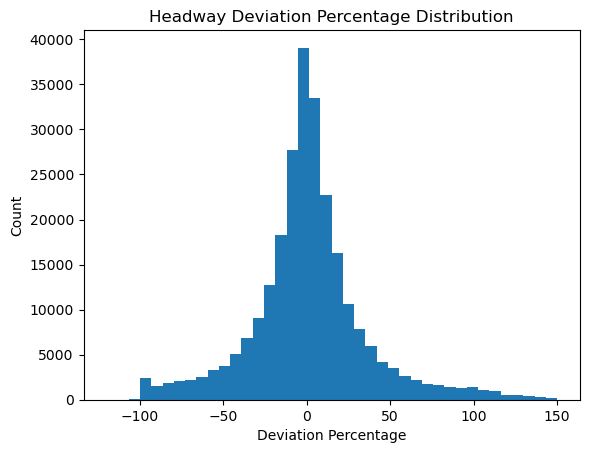

In [131]:
plt.hist(x=wego8['HDWY_DEV_PER'],bins=40, range=(-120, 150))
plt.title('Headway Deviation Percentage Distribution')
plt.xlabel('Deviation Percentage')
plt.ylabel('Count')
plt.show()

In [132]:
wego8['BUNCHING'] = np.where((wego8['HDWY_DEV_PER']<-50), 1,0)

In [133]:
wego8['GAPPING'] = np.where((wego8['HDWY_DEV_PER']>50), 1,0)

In [134]:
wego8['NORMAL'] = np.where(((wego8['HDWY_DEV_PER']>=-50) & (wego8['HDWY_DEV_PER']<=50)), 1, 0)

In [135]:
wego8.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER,BUNCHING,GAPPING,NORMAL,SCHED_HDWY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,0,0,0,None
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,None
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,None
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0,None
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,0,0,0,None


In [86]:
# wego8 = wego8.drop('SCHED_HDWY', axis='columns')

In [137]:
wego8.head(100)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER,BUNCHING,GAPPING,NORMAL,SCHED_HDWY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,0,0,0,None
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,None
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,None
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0,None
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,0,0,0,None
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,None
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0,None
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,7.619046,0,0,1,None
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.619046,0,0,1,None
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-3.222227,0,0,1,None


In [146]:
wego8[['BUNCHING','NORMAL','GAPPING']].value_counts()

BUNCHING  NORMAL  GAPPING
0         1       0          223485
          0       0           72698
                  1           20605
1         0       0           17243
Name: count, dtype: int64

In [192]:
hdwygroup = wego8[['ROUTE_DIRECTION_NAME','BUNCHING','NORMAL','GAPPING']].value_counts().reset_index()
hdwygroup

,ROUTE_DIRECTION_NAME,BUNCHING,NORMAL,GAPPING,count
0,FROM DOWNTOWN,0,1,0,114989
1,TO DOWNTOWN,0,1,0,108496
2,FROM DOWNTOWN,0,0,0,37802
3,TO DOWNTOWN,0,0,0,34896
4,FROM DOWNTOWN,0,0,1,12968
5,FROM DOWNTOWN,1,0,0,11233
6,TO DOWNTOWN,0,0,1,7637
7,TO DOWNTOWN,1,0,0,6010


<Axes: xlabel='BUNCHING', ylabel='count'>

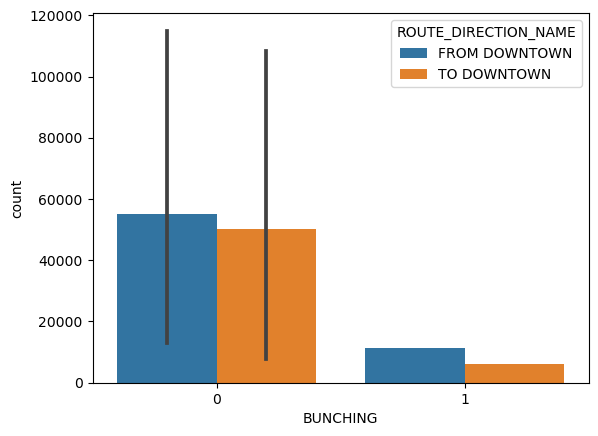

In [201]:
# plt.hist(x=hdwygroup['HDWY_DEV_PER'],bins=40, range=(-120, 150))
# plt.title('Headway Deviation Percentage Distribution')
# plt.xlabel('Deviation Percentage')
# plt.ylabel('Count')
# plt.show()

sns.barplot(x = 'BUNCHING',
            y = 'count',
            hue = 'ROUTE_DIRECTION_NAME' ,
            data = hdwygroup)

# hdwygroup.plot(kind = 'bar, stacked=True, color = ['BUNCHING','NORMAL', 'GAPPING'])
            

<Axes: xlabel='GAPPING', ylabel='count'>

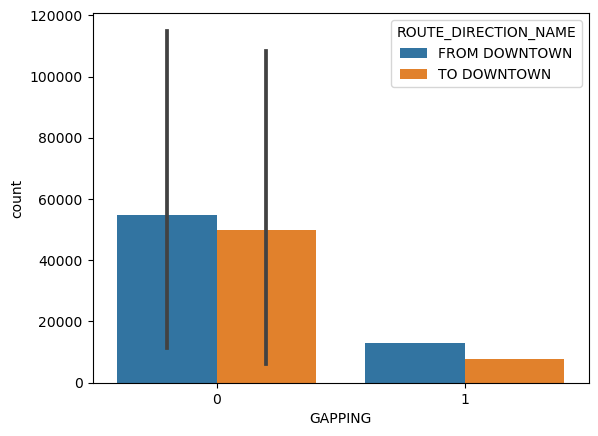

In [202]:
sns.barplot(x = 'GAPPING',
            y = 'count',
            hue = 'ROUTE_DIRECTION_NAME' ,
            data = hdwygroup)

<Axes: xlabel='NORMAL', ylabel='count'>

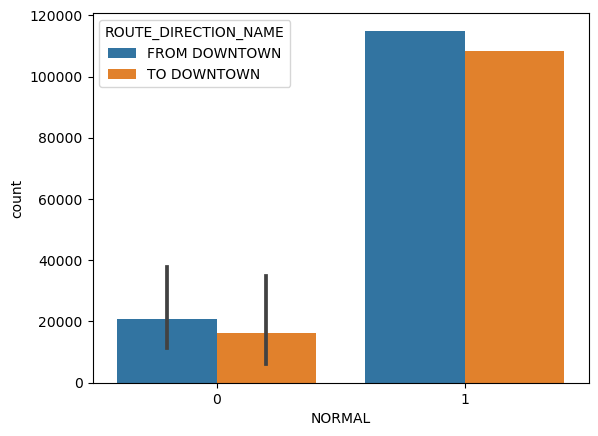

In [203]:
sns.barplot(x = 'NORMAL',
            y = 'count',
            hue = 'ROUTE_DIRECTION_NAME' ,
            data = hdwygroup)

In [168]:
# wego8[['ROUTE_DIRECTION_NAME','OPERATOR','ADJUSTED_ONTIME_COUNT']].value_counts()

In [141]:
wego8[['ROUTE_DIRECTION_NAME','ADJUSTED_ONTIME_COUNT']].value_counts()

ROUTE_DIRECTION_NAME  ADJUSTED_ONTIME_COUNT
TO DOWNTOWN           1                        133752
FROM DOWNTOWN         1                        133139
                      0                         43853
TO DOWNTOWN           0                         23287
Name: count, dtype: int64

In [110]:
133752/(133752+133139)

0.501148408901012

In [172]:
print(f"On-time percentage heading to downtown:{round(100*(133752/(133752+23287)))}")
print(f"On-time percentage heading from downtown:{round(100*(133139/(133139+43853)))}")
133752/(133752+23287)

On-time percentage heading to downtown:85
On-time percentage heading from downtown:75


0.8517119951094951

### 85 percent of the buses heading to downtown arrive on time

In [115]:
133139/(133139+43853)

0.7522317392876514

### 75 percent of the buses heading from downtown arrive on time

# Percentage of Arrival heading to and from downtown

In [187]:
print(f"Early percentage heading to downtown:{round(100*(4338/(152701+4338)),2)}%")
print(f"Early percentage heading from downtown:{round(100*(5112/(171880+5112)),2)}%\n")

print(f"On-time percentage heading to downtown:{round(100*(133752/(133752+23287)))}%")
print(f"On-time percentage heading from downtown:{round(100*(133139/(133139+43853)))}%\n")

print(f"Late percentage heading to downtown:{round(100*(18949/(138090+18949)))}%")
print(f"Late percentage heading from downtown:{round(100*(38741/(138251+38741)))}%")

Early percentage heading to downtown:2.76%
Early percentage heading from downtown:2.89%

On-time percentage heading to downtown:85%
On-time percentage heading from downtown:75%

Late percentage heading to downtown:12%
Late percentage heading from downtown:22%


In [143]:
wego8[['ROUTE_DIRECTION_NAME','ADJUSTED_EARLY_COUNT']].value_counts()

ROUTE_DIRECTION_NAME  ADJUSTED_EARLY_COUNT
FROM DOWNTOWN         0                       171880
TO DOWNTOWN           0                       152701
FROM DOWNTOWN         1                         5112
TO DOWNTOWN           1                         4338
Name: count, dtype: int64

In [178]:
# # df.loc[(df['team'] == 'A') & (df['conference'] == 'East'), 'points'].sum()

# wego8.loc[(wego8['ADJUSTED_EARLY_COUNT'] == 1) & (wego8['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN')].sum()
# #(wego8['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN') & (wego8['ADJUSTED_EARLY_COUNT']==1)

In [148]:
#Early from downtown
5112/(171880+5112)

0.028882661363225457

In [165]:
#Early to downtown
4338/(152701+4338)

0.027623711307382243

In [145]:
wego8[['ROUTE_DIRECTION_NAME','ADJUSTED_LATE_COUNT']].value_counts()

ROUTE_DIRECTION_NAME  ADJUSTED_LATE_COUNT
FROM DOWNTOWN         0                      138251
TO DOWNTOWN           0                      138090
FROM DOWNTOWN         1                       38741
TO DOWNTOWN           1                       18949
Name: count, dtype: int64

In [177]:
#Late from downtown
print(38741/(138251+38741))
#Late to downtown
print(18949/(138090+18949))

0.21888559934912313
0.12066429358312267


In [188]:
#Location
wego8[['TIME_POINT_ABBR','ADJUSTED_ONTIME_COUNT']].value_counts()

TIME_POINT_ABBR  ADJUSTED_ONTIME_COUNT
GXRVRGAT         1                        11749
DWMRT            1                        11607
WHBG             1                         8810
MCC4_18          1                         8784
GXMADISO         1                         8289
GXGRNFLD         1                         8037
GXFIVEPT         1                         7897
HHWM             1                         7643
MCC4_15          1                         7615
MCC4_24          1                         7535
MCC5_10          1                         6980
MCC4_19          1                         6975
DKTL             1                         6961
MXTHOMP          1                         6905
MXBELL           1                         6729
WMRT             1                         6724
N1SP             1                         6644
MCC5_5           1                         6573
MXWHARF          1                         6542
NVFG             1                         6485
C

In [191]:
wego8[['ROUTE_DIRECTION_NAME','BUNCHING', 'GAPPING']].value_counts()

ROUTE_DIRECTION_NAME  BUNCHING  GAPPING
FROM DOWNTOWN         0         0          152791
TO DOWNTOWN           0         0          143392
FROM DOWNTOWN         0         1           12968
                      1         0           11233
TO DOWNTOWN           0         1            7637
                      1         0            6010
Name: count, dtype: int64